# Description

This notebook is used to find currencies that are exactly the same in our universe.

# Imports

In [1]:
import logging
import os

import seaborn as sns

import core.config.config_ as cconconf
import core.plotting as coplotti
import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint
import helpers.hs3 as hs3
import im_v2.common.universe as ivcu
import research_amp.cc.statistics as ramccsta

/app/core/explore.py:39: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tauton


In [2]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

AM_AWS_PROFILE = "am"

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-d5b3b8ed-7d30-45e3-a32c-f436b88d28da.json'
>>ENV<<: is_inside_container=True: code_version=0, container_version=cmamp-1.0.0, is_inside_docker=True, is_inside_ci=False, CI_defined=True, CI=''
>>ENV<<: AM_AWS_PROFILE=True AM_ECR_BASE_PATH=True AM_S3_BUCKET=True AM_TELEGRAM_TOKEN=True AWS_ACCESS_KEY_ID=False AWS_DEFAULT_REGION=False AWS_SECRET_ACCESS_KEY=False GH_ACTION_ACCESS_TOKEN=True
# Git
    branch_name='CMTask587_propagate_universe_changes'
    hash='6c5711c72'
    # Last commits:
      *   6c5711c72 PomazkinG Merge branch 'master' into CMTask587_propagate_universe_changes   ( 2 minutes ago) Thu Nov 25 22:23:05 2021  (HEAD -> CMTask587_propagate_universe_changes)
      |\  
      * | 967699d8a PomazkinG remove import                                                     ( 2 minutes ago) Thu Nov 25 22:22:58 2021           
      * | db04c88b7 PomazkinG fix stats           

# Config

In [3]:
def get_config() -> cconconf.Config:
    """
    Get config that controls parameters.
    """
    config = cconconf.Config()
    # Load parameters.
    config.add_subconfig("load")
    config["load"]["aws_profile"] = AM_AWS_PROFILE
    config["load"]["data_dir"] = os.path.join(
        hs3.get_s3_bucket_path(AM_AWS_PROFILE), "data"
    )
    # Data parameters.
    config.add_subconfig("data")
    config["data"]["universe_version"] = "v03"
    config["data"]["data_type"] = "OHLCV"
    config["data"]["vendor"] = "CCXT"
    config["data"]["price_column"] = "close"
    return config


config = get_config()
print(config)

load:
  aws_profile: am
  data_dir: s3://alphamatic-data/data
data:
  universe_version: v03
  data_type: OHLCV
  vendor: CCXT
  price_column: close


# Get price data for a given universe

In [4]:
vendor_universe = ivcu.get_vendor_universe(
    config["data"]["vendor"],
    version=config["data"]["universe_version"],
    as_full_symbol=True,
)
vendor_universe

['binance::ADA_USDT',
 'binance::AVAX_USDT',
 'binance::BNB_USDT',
 'binance::BTC_USDT',
 'binance::DOGE_USDT',
 'binance::EOS_USDT',
 'binance::ETH_USDT',
 'binance::LINK_USDT',
 'binance::SOL_USDT',
 'ftx::BNB_USDT',
 'ftx::BTC_USDT',
 'ftx::DOGE_USDT',
 'ftx::ETH_USDT',
 'ftx::LINK_USDT',
 'ftx::SOL_USDT',
 'ftx::XRP_USDT',
 'gateio::ADA_USDT',
 'gateio::AVAX_USDT',
 'gateio::BNB_USDT',
 'gateio::BTC_USDT',
 'gateio::DOGE_USDT',
 'gateio::EOS_USDT',
 'gateio::ETH_USDT',
 'gateio::FIL_USDT',
 'gateio::LINK_USDT',
 'gateio::SOL_USDT',
 'gateio::XRP_USDT',
 'kucoin::ADA_USDT',
 'kucoin::AVAX_USDT',
 'kucoin::BNB_USDT',
 'kucoin::BTC_USDT',
 'kucoin::DOGE_USDT',
 'kucoin::EOS_USDT',
 'kucoin::ETH_USDT',
 'kucoin::FIL_USDT',
 'kucoin::LINK_USDT',
 'kucoin::SOL_USDT',
 'kucoin::XRP_USDT']

In [5]:
df_price = ramccsta.get_universe_price_data(vendor_universe, config)
df_price.head(3)

Reading CCXT data for exchange id='binance', currencies='ADA_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/ADA_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='ADA_USDT'...
Index length increased by 4520 = 1622000 - 1617480
Reading CCXT data for exchange id='binance', currencies='AVAX_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/AVAX_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='AVAX_USDT'...
Index length increased by 1224 = 517498 - 516274
Reading CCXT data for exchange id='binance', currencies='BNB_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BNB_USDT.csv.gz'...
Processing CCXT data for exchange id='binance', currencies='BNB_USDT'...
Index length increased by 4520 = 1622295 - 1617775
Reading CCXT data for exchange id='binance', currencies='BTC_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/binance/BTC_USDT.csv.gz'...
Processing CCXT data for exchange id='binan

Index length increased by 94496 = 1619786 - 1525290
Reading CCXT data for exchange id='kucoin', currencies='DOGE_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/DOGE_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='DOGE_USDT'...
Index length=314817 has not changed
Reading CCXT data for exchange id='kucoin', currencies='EOS_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/EOS_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='EOS_USDT'...
Index length increased by 232290 = 1621431 - 1389141
Reading CCXT data for exchange id='kucoin', currencies='ETH_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/ETH_USDT.csv.gz'...
Processing CCXT data for exchange id='kucoin', currencies='ETH_USDT'...
Index length increased by 117548 = 1619960 - 1502412
Reading CCXT data for exchange id='kucoin', currencies='FIL_USDT' from file='s3://alphamatic-data/data/ccxt/20210924/kucoin/FIL_USDT.csv.gz'...
Processing 

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
2018-08-16 20:00:00-04:00,0.09479,NaN,9.7778,6311.64,NaN,4.5131,286.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6325.770051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,0.09473,NaN,9.7608,6302.81,NaN,4.5074,286.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.204997,NaN,NaN,286.712987,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,0.09456,NaN,9.7384,6297.26,NaN,4.5010,285.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6297.333413,NaN,NaN,285.400197,NaN,NaN,NaN,NaN


In [6]:
df_price.describe().round(2)

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
count,1617480.00,516274.00,1617775.00,1615122.00,1154731.00,1617924.00,1615369.00,1398630.00,574916.00,763247.00,780671.00,362575.00,780713.00,747035.00,607399.00,618149.00,129365.00,129134.00,129250.00,129606.00,129422.00,129192.00,129606.00,129480.00,129307.00,129595.00,129537.00,1158284.00,280129.00,1180057.00,1525290.00,314817.00,1389141.00,1502412.00,482205.00,563664.00,60509.00,1357381.00
mean,0.36,18.46,88.08,16838.60,0.07,3.91,701.20,10.48,23.68,172.17,27807.60,0.21,1297.83,18.25,24.89,0.62,1.85,26.20,369.49,41020.73,0.25,4.45,2748.26,65.37,22.99,68.41,0.88,0.48,25.48,115.76,17577.17,0.23,3.87,742.78,64.36,21.83,96.05,0.42
std,0.62,14.26,149.35,16067.01,0.12,1.52,934.83,11.28,32.94,188.43,17832.96,0.14,1119.93,10.75,36.00,0.39,0.64,18.39,72.03,6741.16,0.04,0.71,640.95,14.89,5.13,51.64,0.26,0.69,12.21,166.45,16271.93,0.14,1.53,958.17,43.94,9.47,50.82,0.32
min,0.02,2.75,4.12,3157.67,0.00,1.39,82.03,0.35,1.06,13.45,5860.50,0.01,123.83,3.34,1.07,0.17,1.02,9.34,251.82,29325.12,0.16,3.16,1718.22,40.13,13.40,22.19,0.52,0.02,9.34,6.48,3160.00,0.04,1.39,82.03,10.00,7.31,33.41,0.11
25%,0.05,4.19,15.09,6755.01,0.00,2.69,171.64,2.11,2.63,22.45,10538.50,0.06,346.96,10.35,2.46,0.27,1.31,11.74,306.40,33908.61,0.21,3.86,2131.36,53.78,18.31,31.37,0.64,0.05,13.72,17.50,7250.80,0.06,2.70,175.04,29.95,12.99,44.44,0.24
50%,0.08,13.55,21.46,9440.79,0.00,3.55,231.35,4.10,13.17,37.45,23824.00,0.22,647.65,15.80,11.99,0.53,1.43,14.65,341.44,42247.00,0.24,4.29,2836.78,62.33,23.90,37.44,0.76,0.10,25.66,27.34,9668.90,0.24,3.51,239.92,51.43,21.32,76.43,0.30
75%,0.15,29.53,33.86,19077.00,0.05,4.88,588.93,16.55,33.90,320.78,44994.00,0.30,2145.50,26.82,34.06,0.87,2.45,44.28,421.36,47166.80,0.28,5.02,3268.02,76.16,27.21,93.76,1.12,1.06,33.56,225.85,23669.25,0.31,4.60,704.00,77.31,28.26,141.71,0.46
max,3.10,65.55,691.06,64800.00,0.74,14.84,4363.95,52.95,215.14,691.22,64805.00,0.74,4365.00,52.91,215.00,1.97,3.10,76.06,518.71,52868.97,0.35,6.39,4020.17,119.97,36.31,214.90,1.41,3.10,64.78,691.24,64794.70,0.74,14.84,4366.28,237.51,52.95,215.04,1.96


In [7]:
df_price.head()

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
2018-08-16 20:00:00-04:00,0.09479,NaN,9.7778,6311.64,NaN,4.5131,286.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6325.770051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,0.09473,NaN,9.7608,6302.81,NaN,4.5074,286.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.204997,NaN,NaN,286.712987,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,0.09456,NaN,9.7384,6297.26,NaN,4.5010,285.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6297.333413,NaN,NaN,285.400197,NaN,NaN,NaN,NaN
2018-08-16 20:03:00-04:00,0.09417,NaN,9.7220,6294.52,NaN,4.4974,285.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6303.552635,NaN,NaN,285.400193,NaN,NaN,NaN,NaN
2018-08-16 20:04:00-04:00,0.09421,NaN,9.7220,6296.10,NaN,4.4974,285.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285.884638,NaN,NaN,NaN,NaN


# Find same currencies

In [8]:
df_returns = df_price.pct_change()
df_returns.head(3)

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
2018-08-16 20:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:01:00-04:00,-0.000633,NaN,-0.001739,-0.001399,NaN,-0.001263,-0.000628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-16 20:02:00-04:00,-0.001795,NaN,-0.002295,-0.000881,NaN,-0.001420,-0.002828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001882,NaN,NaN,-0.004579,NaN,NaN,NaN,NaN


The corr_df.shape[0]='38' > 20


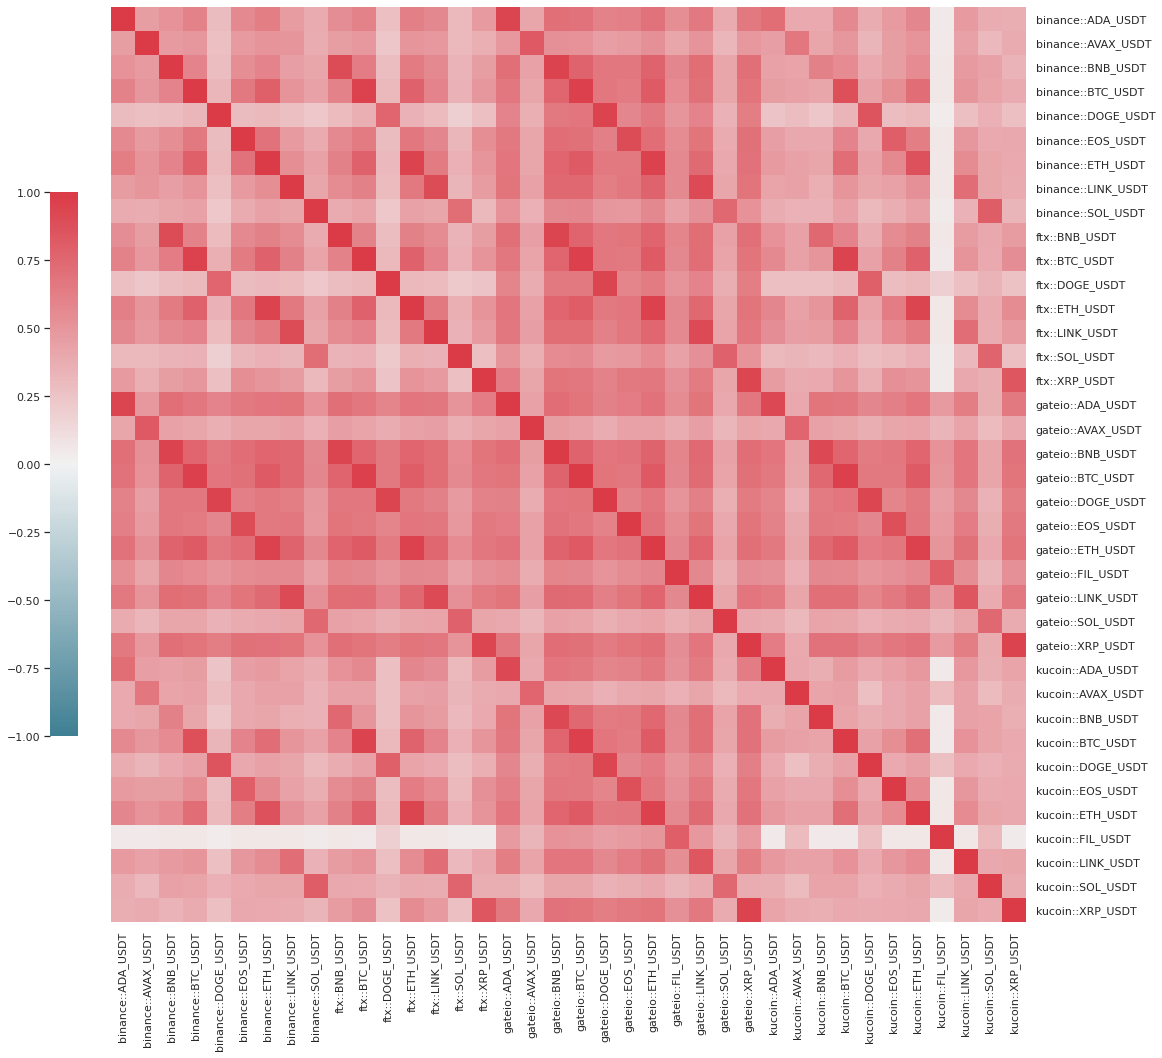

In [9]:
corr_matrix = df_returns.corr()
_ = coplotti.plot_heatmap(corr_matrix)

`cluster_and_select()` distinguishes clusters but some very highly correlated stable coins are clustered together so it seems like that we cannot rely on dendrodram and clustering alone.

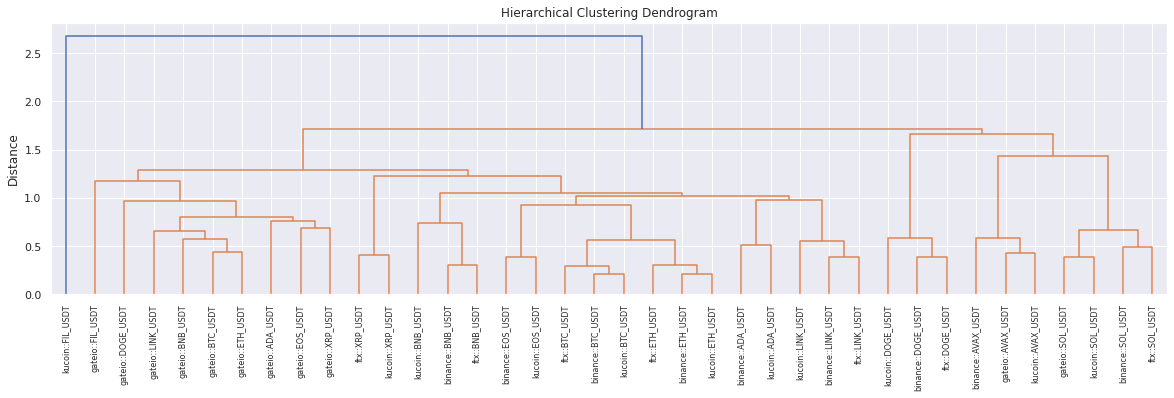

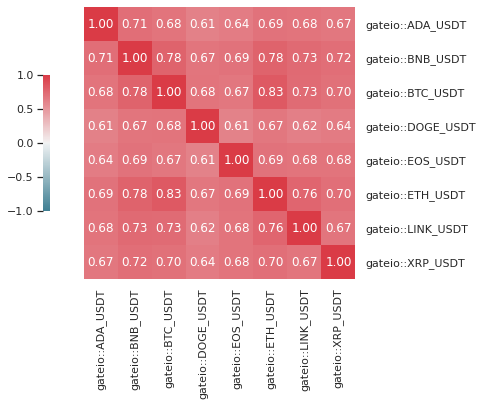

Current cluster is 1
Original series in cluster is ['gateio::ADA_USDT', 'gateio::ETH_USDT', 'gateio::EOS_USDT', 'gateio::BTC_USDT', 'gateio::XRP_USDT', 'gateio::DOGE_USDT', 'gateio::LINK_USDT', 'gateio::BNB_USDT']
Series to keep in cluster is ['gateio::ADA_USDT', 'gateio::BNB_USDT', 'gateio::BTC_USDT', 'gateio::DOGE_USDT', 'gateio::EOS_USDT', 'gateio::LINK_USDT', 'gateio::XRP_USDT']


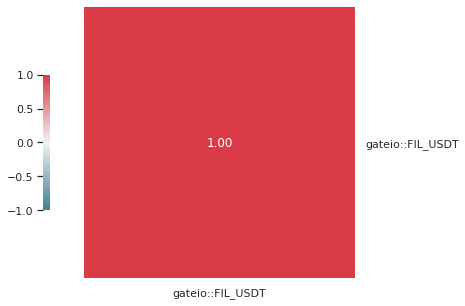

Current cluster is 2
Original series in cluster is ['gateio::FIL_USDT']
Series to keep in cluster is ['gateio::FIL_USDT']


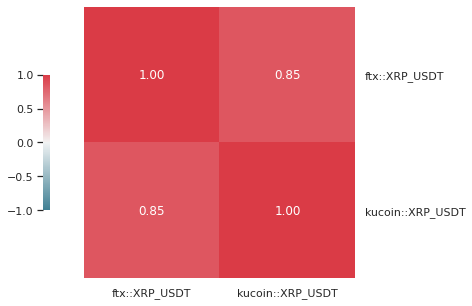

Current cluster is 3
Original series in cluster is ['kucoin::XRP_USDT', 'ftx::XRP_USDT']
Series to keep in cluster is ['ftx::XRP_USDT']


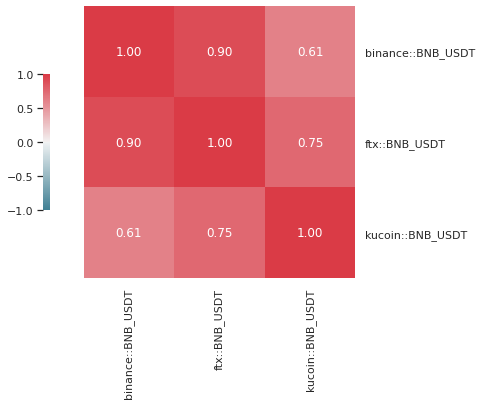

Current cluster is 4
Original series in cluster is ['ftx::BNB_USDT', 'binance::BNB_USDT', 'kucoin::BNB_USDT']
Series to keep in cluster is ['binance::BNB_USDT', 'kucoin::BNB_USDT']


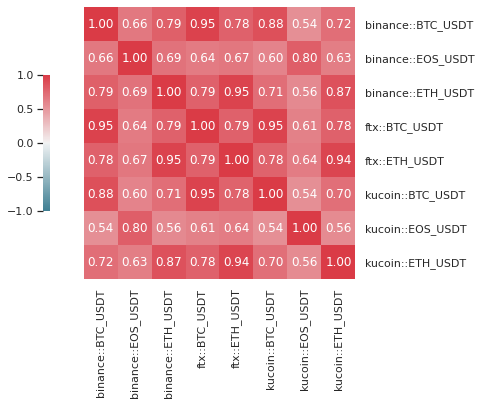

Current cluster is 5
Original series in cluster is ['kucoin::BTC_USDT', 'kucoin::ETH_USDT', 'ftx::ETH_USDT', 'kucoin::EOS_USDT', 'ftx::BTC_USDT', 'binance::BTC_USDT', 'binance::ETH_USDT', 'binance::EOS_USDT']
Series to keep in cluster is ['binance::BTC_USDT', 'binance::EOS_USDT', 'binance::ETH_USDT', 'kucoin::EOS_USDT']


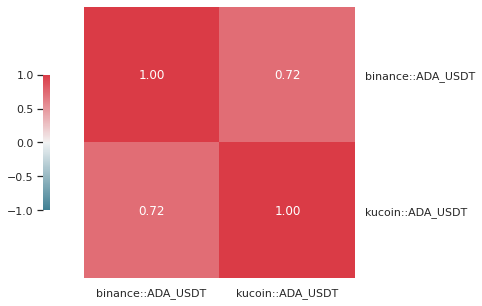

Current cluster is 6
Original series in cluster is ['kucoin::ADA_USDT', 'binance::ADA_USDT']
Series to keep in cluster is ['binance::ADA_USDT', 'kucoin::ADA_USDT']


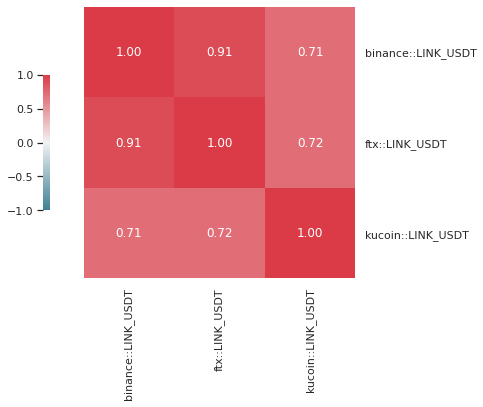

Current cluster is 7
Original series in cluster is ['ftx::LINK_USDT', 'binance::LINK_USDT', 'kucoin::LINK_USDT']
Series to keep in cluster is ['binance::LINK_USDT', 'kucoin::LINK_USDT']


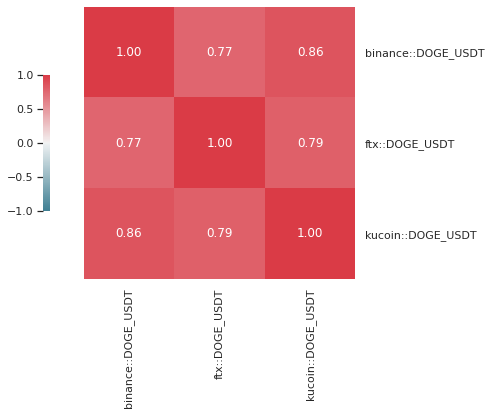

Current cluster is 8
Original series in cluster is ['binance::DOGE_USDT', 'ftx::DOGE_USDT', 'kucoin::DOGE_USDT']
Series to keep in cluster is ['binance::DOGE_USDT', 'ftx::DOGE_USDT']


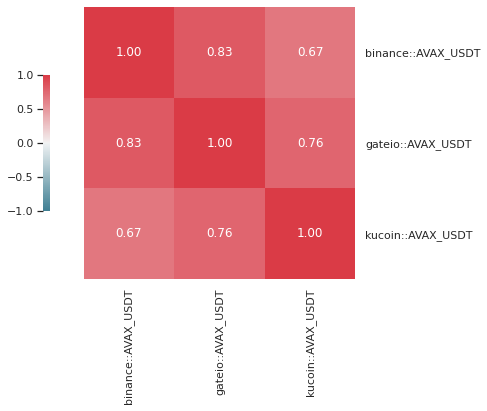

Current cluster is 9
Original series in cluster is ['kucoin::AVAX_USDT', 'binance::AVAX_USDT', 'gateio::AVAX_USDT']
Series to keep in cluster is ['binance::AVAX_USDT', 'kucoin::AVAX_USDT']


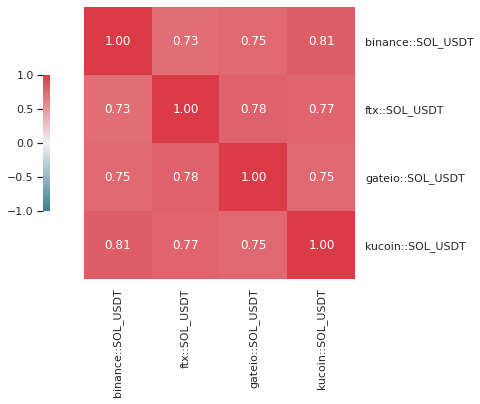

Current cluster is 10
Original series in cluster is ['kucoin::SOL_USDT', 'gateio::SOL_USDT', 'ftx::SOL_USDT', 'binance::SOL_USDT']
Series to keep in cluster is ['binance::SOL_USDT', 'ftx::SOL_USDT', 'gateio::SOL_USDT']


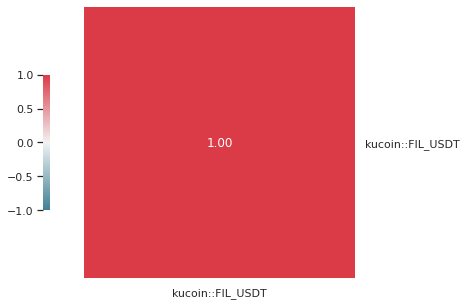

Current cluster is 11
Original series in cluster is ['kucoin::FIL_USDT']
Series to keep in cluster is ['kucoin::FIL_USDT']
Final number of selected time series is 27
Series to keep are: ['gateio::ADA_USDT', 'gateio::BNB_USDT', 'gateio::BTC_USDT', 'gateio::DOGE_USDT', 'gateio::EOS_USDT', 'gateio::LINK_USDT', 'gateio::XRP_USDT', 'gateio::FIL_USDT', 'ftx::XRP_USDT', 'binance::BNB_USDT', 'kucoin::BNB_USDT', 'binance::BTC_USDT', 'binance::EOS_USDT', 'binance::ETH_USDT', 'kucoin::EOS_USDT', 'binance::ADA_USDT', 'kucoin::ADA_USDT', 'binance::LINK_USDT', 'kucoin::LINK_USDT', 'binance::DOGE_USDT', 'ftx::DOGE_USDT', 'binance::AVAX_USDT', 'kucoin::AVAX_USDT', 'binance::SOL_USDT', 'ftx::SOL_USDT', 'gateio::SOL_USDT', 'kucoin::FIL_USDT']


In [10]:
_ = coplotti.cluster_and_select(df_returns, 11)

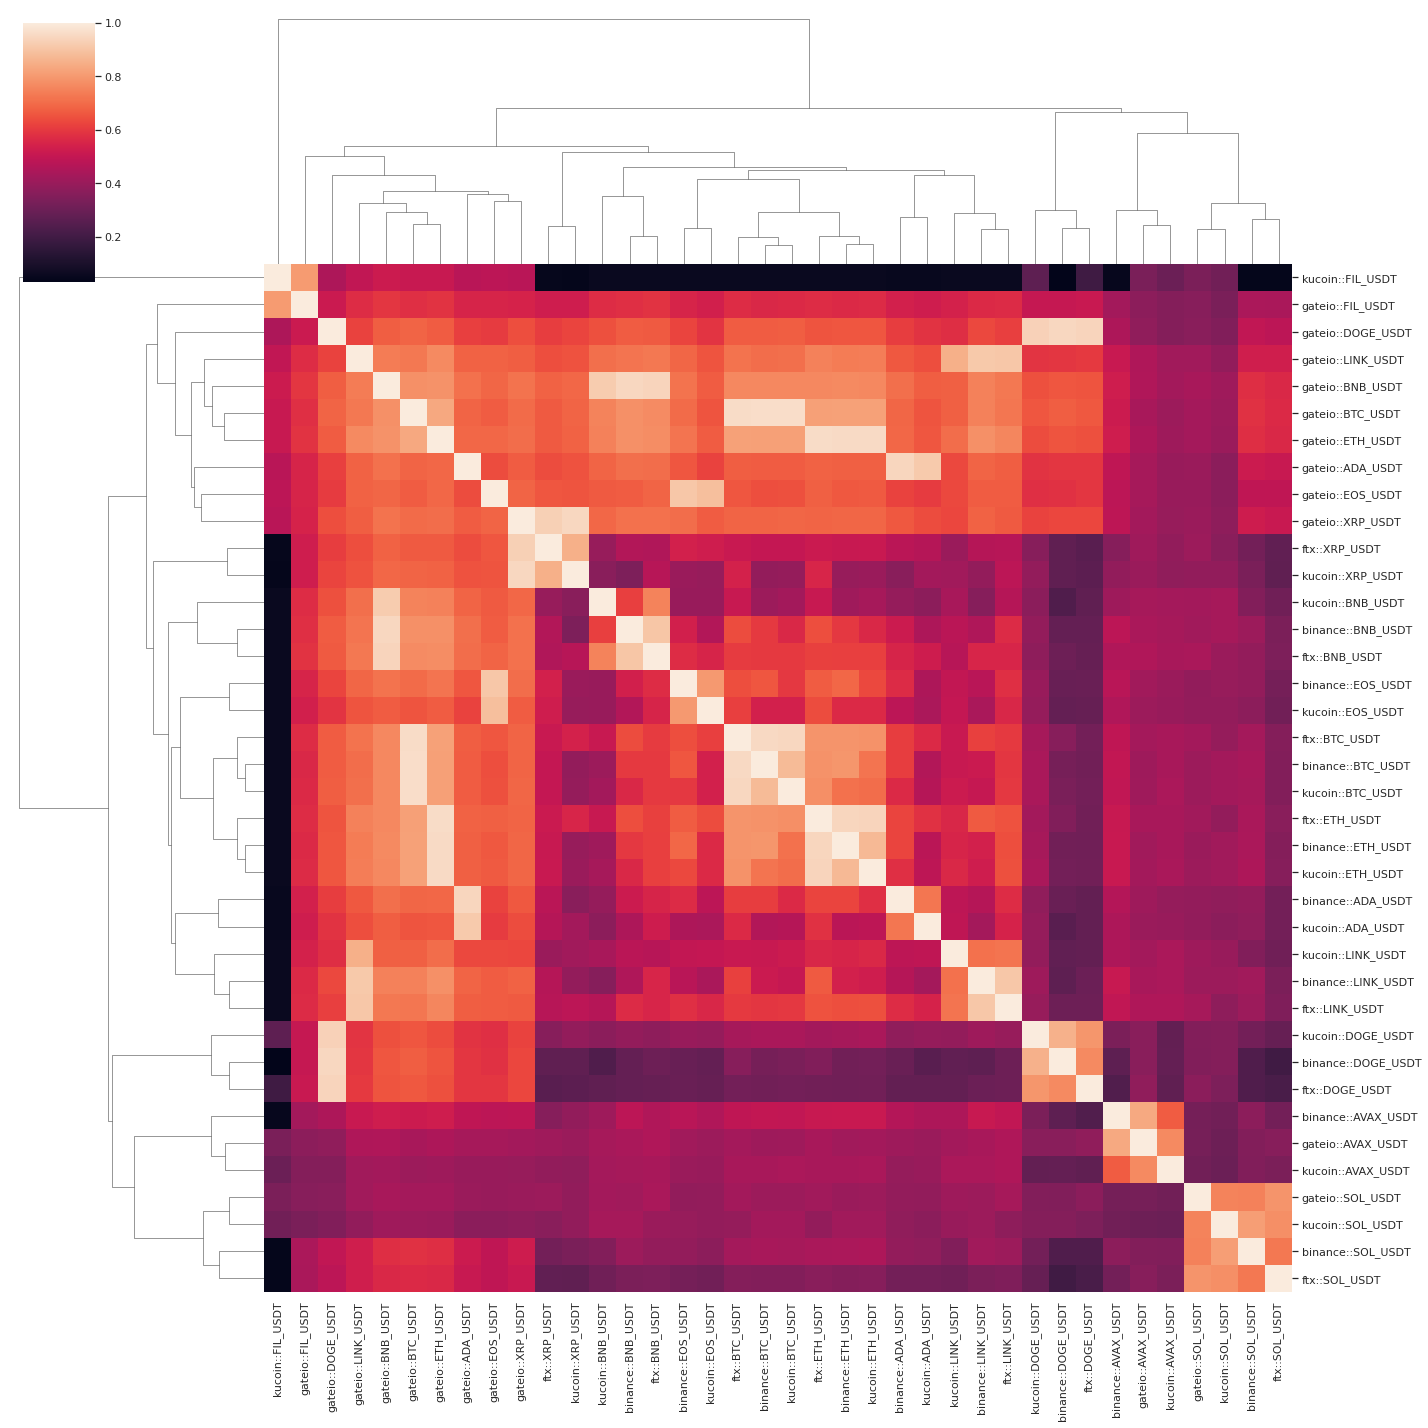

In [11]:
_ = sns.clustermap(corr_matrix, figsize=(20, 20))

In [12]:
# Display top 10 most correlated series for each currency pair.
for colname in corr_matrix.columns:
    corr_srs = corr_matrix[colname]
    corr_srs_sorted = corr_srs.sort_values(ascending=False)
    display(corr_srs_sorted.head(10))

binance::ADA_USDT    1.000000
gateio::ADA_USDT     0.944664
kucoin::ADA_USDT     0.720469
gateio::BNB_USDT     0.705092
gateio::ETH_USDT     0.692818
gateio::BTC_USDT     0.687551
gateio::XRP_USDT     0.662369
gateio::LINK_USDT    0.662019
binance::ETH_USDT    0.625145
ftx::ETH_USDT        0.624470
Name: binance::ADA_USDT, dtype: float64

binance::AVAX_USDT    1.000000
gateio::AVAX_USDT     0.834062
kucoin::AVAX_USDT     0.669087
gateio::BNB_USDT      0.526929
gateio::ETH_USDT      0.523876
gateio::BTC_USDT      0.517972
kucoin::ETH_USDT      0.510332
gateio::LINK_USDT     0.510200
binance::ETH_USDT     0.508276
binance::LINK_USDT    0.507633
Name: binance::AVAX_USDT, dtype: float64

binance::BNB_USDT    1.000000
gateio::BNB_USDT     0.949721
ftx::BNB_USDT        0.903853
gateio::BTC_USDT     0.777453
gateio::ETH_USDT     0.777437
gateio::LINK_USDT    0.718947
gateio::XRP_USDT     0.710867
gateio::ADA_USDT     0.705200
gateio::EOS_USDT     0.669942
gateio::DOGE_USDT    0.667337
Name: binance::BNB_USDT, dtype: float64

binance::BTC_USDT    1.000000
gateio::BTC_USDT     0.963712
ftx::BTC_USDT        0.953863
kucoin::BTC_USDT     0.878891
gateio::ETH_USDT     0.813837
binance::ETH_USDT    0.789630
ftx::ETH_USDT        0.781370
gateio::BNB_USDT     0.758958
kucoin::ETH_USDT     0.716707
gateio::LINK_USDT    0.702086
Name: binance::BTC_USDT, dtype: float64

binance::DOGE_USDT    1.000000
gateio::DOGE_USDT     0.950417
kucoin::DOGE_USDT     0.855005
ftx::DOGE_USDT        0.765061
gateio::BTC_USDT      0.672000
gateio::BNB_USDT      0.657051
gateio::ETH_USDT      0.652952
gateio::XRP_USDT      0.627209
gateio::LINK_USDT     0.594410
gateio::ADA_USDT      0.594250
Name: binance::DOGE_USDT, dtype: float64

binance::EOS_USDT    1.000000
gateio::EOS_USDT     0.905676
kucoin::EOS_USDT     0.799292
gateio::ETH_USDT     0.717279
gateio::BNB_USDT     0.712578
gateio::XRP_USDT     0.701941
gateio::BTC_USDT     0.699838
binance::ETH_USDT    0.690614
gateio::LINK_USDT    0.686727
ftx::ETH_USDT        0.670324
Name: binance::EOS_USDT, dtype: float64

binance::ETH_USDT    1.000000
gateio::ETH_USDT     0.957310
ftx::ETH_USDT        0.946280
kucoin::ETH_USDT     0.873923
gateio::BTC_USDT     0.817644
binance::BTC_USDT    0.789630
ftx::BTC_USDT        0.785819
gateio::BNB_USDT     0.761829
gateio::LINK_USDT    0.734454
kucoin::BTC_USDT     0.712124
Name: binance::ETH_USDT, dtype: float64

binance::LINK_USDT    1.000000
gateio::LINK_USDT     0.912532
ftx::LINK_USDT        0.905956
gateio::ETH_USDT      0.776982
gateio::BNB_USDT      0.745537
gateio::BTC_USDT      0.744891
kucoin::LINK_USDT     0.711930
gateio::ADA_USDT      0.684521
gateio::XRP_USDT      0.680928
gateio::EOS_USDT      0.667514
Name: binance::LINK_USDT, dtype: float64

binance::SOL_USDT    1.000000
kucoin::SOL_USDT     0.810575
gateio::SOL_USDT     0.745813
ftx::SOL_USDT        0.725650
gateio::BTC_USDT     0.581416
gateio::ETH_USDT     0.575396
gateio::BNB_USDT     0.573421
gateio::LINK_USDT    0.528800
gateio::XRP_USDT     0.523184
gateio::ADA_USDT     0.517625
Name: binance::SOL_USDT, dtype: float64

ftx::BNB_USDT        1.000000
gateio::BNB_USDT     0.942337
binance::BNB_USDT    0.903853
gateio::ETH_USDT     0.771126
gateio::BTC_USDT     0.768273
kucoin::BNB_USDT     0.746558
gateio::LINK_USDT    0.724786
gateio::XRP_USDT     0.710090
gateio::ADA_USDT     0.704222
gateio::EOS_USDT     0.682997
Name: ftx::BNB_USDT, dtype: float64

ftx::BTC_USDT        1.000000
gateio::BTC_USDT     0.961811
binance::BTC_USDT    0.953863
kucoin::BTC_USDT     0.950069
gateio::ETH_USDT     0.817217
ftx::ETH_USDT        0.786635
binance::ETH_USDT    0.785819
kucoin::ETH_USDT     0.782680
gateio::BNB_USDT     0.761265
gateio::LINK_USDT    0.714072
Name: ftx::BTC_USDT, dtype: float64

ftx::DOGE_USDT        1.000000
gateio::DOGE_USDT     0.942983
kucoin::DOGE_USDT     0.789320
binance::DOGE_USDT    0.765061
gateio::BTC_USDT      0.661325
gateio::BNB_USDT      0.653362
gateio::ETH_USDT      0.645668
gateio::XRP_USDT      0.626563
gateio::LINK_USDT     0.599163
gateio::ADA_USDT      0.593527
Name: ftx::DOGE_USDT, dtype: float64

ftx::ETH_USDT        1.000000
gateio::ETH_USDT     0.959046
binance::ETH_USDT    0.946280
kucoin::ETH_USDT     0.943107
gateio::BTC_USDT     0.811606
ftx::BTC_USDT        0.786635
binance::BTC_USDT    0.781370
kucoin::BTC_USDT     0.776370
gateio::BNB_USDT     0.759020
gateio::LINK_USDT    0.745140
Name: ftx::ETH_USDT, dtype: float64

ftx::LINK_USDT        1.000000
gateio::LINK_USDT     0.906626
binance::LINK_USDT    0.905956
gateio::ETH_USDT      0.755621
gateio::BNB_USDT      0.724757
gateio::BTC_USDT      0.720228
kucoin::LINK_USDT     0.718353
gateio::ADA_USDT      0.671801
gateio::EOS_USDT      0.668661
gateio::XRP_USDT      0.664489
Name: ftx::LINK_USDT, dtype: float64

ftx::SOL_USDT        1.000000
gateio::SOL_USDT     0.784850
kucoin::SOL_USDT     0.773288
binance::SOL_USDT    0.725650
gateio::BTC_USDT     0.563368
gateio::BNB_USDT     0.559957
gateio::ETH_USDT     0.558961
gateio::LINK_USDT    0.527562
gateio::XRP_USDT     0.508869
gateio::ADA_USDT     0.508013
Name: ftx::SOL_USDT, dtype: float64

ftx::XRP_USDT        1.000000
gateio::XRP_USDT     0.931515
kucoin::XRP_USDT     0.848908
gateio::BNB_USDT     0.680320
gateio::ETH_USDT     0.665871
gateio::BTC_USDT     0.664605
gateio::EOS_USDT     0.657223
gateio::LINK_USDT    0.641734
gateio::ADA_USDT     0.639355
gateio::DOGE_USDT    0.609261
Name: ftx::XRP_USDT, dtype: float64

gateio::ADA_USDT      1.000000
binance::ADA_USDT     0.944664
kucoin::ADA_USDT      0.916007
gateio::BNB_USDT      0.711904
binance::BNB_USDT     0.705200
ftx::BNB_USDT         0.704222
gateio::ETH_USDT      0.693160
kucoin::BNB_USDT      0.684863
gateio::BTC_USDT      0.684834
binance::LINK_USDT    0.684521
Name: gateio::ADA_USDT, dtype: float64

gateio::AVAX_USDT     1.000000
binance::AVAX_USDT    0.834062
kucoin::AVAX_USDT     0.762211
gateio::BNB_USDT      0.454309
ftx::BNB_USDT         0.452981
gateio::LINK_USDT     0.449191
ftx::LINK_USDT        0.447842
gateio::ETH_USDT      0.444110
binance::BNB_USDT     0.436434
ftx::ETH_USDT         0.434597
Name: gateio::AVAX_USDT, dtype: float64

gateio::BNB_USDT     1.000000
binance::BNB_USDT    0.949721
ftx::BNB_USDT        0.942337
kucoin::BNB_USDT     0.920082
gateio::ETH_USDT     0.780750
gateio::BTC_USDT     0.777201
binance::ETH_USDT    0.761829
ftx::BTC_USDT        0.761265
kucoin::BTC_USDT     0.759233
ftx::ETH_USDT        0.759020
Name: gateio::BNB_USDT, dtype: float64

gateio::BTC_USDT     1.000000
kucoin::BTC_USDT     0.964046
binance::BTC_USDT    0.963712
ftx::BTC_USDT        0.961811
gateio::ETH_USDT     0.832929
binance::ETH_USDT    0.817644
kucoin::ETH_USDT     0.816690
ftx::ETH_USDT        0.811606
binance::BNB_USDT    0.777453
gateio::BNB_USDT     0.777201
Name: gateio::BTC_USDT, dtype: float64

gateio::DOGE_USDT     1.000000
binance::DOGE_USDT    0.950417
ftx::DOGE_USDT        0.942983
kucoin::DOGE_USDT     0.935043
gateio::BTC_USDT      0.683062
kucoin::BTC_USDT      0.672372
gateio::BNB_USDT      0.671944
ftx::BTC_USDT         0.669533
binance::BTC_USDT     0.669173
gateio::ETH_USDT      0.668558
Name: gateio::DOGE_USDT, dtype: float64

gateio::EOS_USDT     1.000000
binance::EOS_USDT    0.905676
kucoin::EOS_USDT     0.888575
gateio::ETH_USDT     0.690298
gateio::BNB_USDT     0.689787
ftx::BNB_USDT        0.682997
gateio::XRP_USDT     0.682576
gateio::LINK_USDT    0.679797
ftx::ETH_USDT        0.675412
binance::BNB_USDT    0.669942
Name: gateio::EOS_USDT, dtype: float64

gateio::ETH_USDT     1.000000
ftx::ETH_USDT        0.959046
binance::ETH_USDT    0.957310
kucoin::ETH_USDT     0.955961
gateio::BTC_USDT     0.832929
ftx::BTC_USDT        0.817217
kucoin::BTC_USDT     0.814619
binance::BTC_USDT    0.813837
gateio::BNB_USDT     0.780750
binance::BNB_USDT    0.777437
Name: gateio::ETH_USDT, dtype: float64

gateio::FIL_USDT     1.000000
kucoin::FIL_USDT     0.801710
gateio::BNB_USDT     0.592413
ftx::BNB_USDT        0.586451
gateio::ETH_USDT     0.584028
binance::BNB_USDT    0.580047
gateio::BTC_USDT     0.578779
kucoin::BNB_USDT     0.572505
ftx::ETH_USDT        0.572030
gateio::LINK_USDT    0.571814
Name: gateio::FIL_USDT, dtype: float64

gateio::LINK_USDT     1.000000
binance::LINK_USDT    0.912532
ftx::LINK_USDT        0.906626
kucoin::LINK_USDT     0.849776
gateio::ETH_USDT      0.762010
ftx::ETH_USDT         0.745140
kucoin::ETH_USDT      0.735671
gateio::BNB_USDT      0.734777
binance::ETH_USDT     0.734454
gateio::BTC_USDT      0.727597
Name: gateio::LINK_USDT, dtype: float64

gateio::SOL_USDT     1.000000
ftx::SOL_USDT        0.784850
kucoin::SOL_USDT     0.749827
binance::SOL_USDT    0.745813
ftx::BNB_USDT        0.439812
gateio::BNB_USDT     0.434047
ftx::LINK_USDT       0.429319
gateio::BTC_USDT     0.427696
gateio::ETH_USDT     0.425212
kucoin::BNB_USDT     0.423488
Name: gateio::SOL_USDT, dtype: float64

gateio::XRP_USDT     1.000000
kucoin::XRP_USDT     0.947989
ftx::XRP_USDT        0.931515
gateio::BNB_USDT     0.715926
binance::BNB_USDT    0.710867
ftx::BNB_USDT        0.710090
gateio::ETH_USDT     0.703600
binance::EOS_USDT    0.701941
gateio::BTC_USDT     0.700489
kucoin::BNB_USDT     0.691600
Name: gateio::XRP_USDT, dtype: float64

kucoin::ADA_USDT     1.000000
gateio::ADA_USDT     0.916007
binance::ADA_USDT    0.720469
gateio::BNB_USDT     0.673396
gateio::ETH_USDT     0.657313
gateio::BTC_USDT     0.655173
gateio::LINK_USDT    0.642992
gateio::XRP_USDT     0.637176
gateio::EOS_USDT     0.605663
gateio::DOGE_USDT    0.587565
Name: kucoin::ADA_USDT, dtype: float64

kucoin::AVAX_USDT     1.000000
gateio::AVAX_USDT     0.762211
binance::AVAX_USDT    0.669087
ftx::LINK_USDT        0.447872
kucoin::LINK_USDT     0.443774
binance::LINK_USDT    0.442663
kucoin::BTC_USDT      0.440265
kucoin::ETH_USDT      0.437724
ftx::BNB_USDT         0.435685
binance::BTC_USDT     0.435614
Name: kucoin::AVAX_USDT, dtype: float64

kucoin::BNB_USDT     1.000000
gateio::BNB_USDT     0.920082
gateio::BTC_USDT     0.748912
ftx::BNB_USDT        0.746558
gateio::ETH_USDT     0.746169
gateio::LINK_USDT    0.705244
gateio::XRP_USDT     0.691600
gateio::ADA_USDT     0.684863
gateio::EOS_USDT     0.663672
gateio::DOGE_USDT    0.647927
Name: kucoin::BNB_USDT, dtype: float64

kucoin::BTC_USDT     1.000000
gateio::BTC_USDT     0.964046
ftx::BTC_USDT        0.950069
binance::BTC_USDT    0.878891
gateio::ETH_USDT     0.814619
ftx::ETH_USDT        0.776370
gateio::BNB_USDT     0.759233
binance::ETH_USDT    0.712124
gateio::LINK_USDT    0.705537
kucoin::ETH_USDT     0.703559
Name: kucoin::BTC_USDT, dtype: float64

kucoin::DOGE_USDT     1.000000
gateio::DOGE_USDT     0.935043
binance::DOGE_USDT    0.855005
ftx::DOGE_USDT        0.789320
gateio::BTC_USDT      0.658788
gateio::BNB_USDT      0.646635
gateio::ETH_USDT      0.639867
gateio::XRP_USDT      0.621416
gateio::LINK_USDT     0.589599
gateio::ADA_USDT      0.585649
Name: kucoin::DOGE_USDT, dtype: float64

kucoin::EOS_USDT     1.000000
gateio::EOS_USDT     0.888575
binance::EOS_USDT    0.799292
gateio::BNB_USDT     0.670555
gateio::ETH_USDT     0.669916
gateio::XRP_USDT     0.667664
gateio::LINK_USDT    0.653734
gateio::BTC_USDT     0.653529
ftx::ETH_USDT        0.636982
gateio::ADA_USDT     0.619445
Name: kucoin::EOS_USDT, dtype: float64

kucoin::ETH_USDT     1.000000
gateio::ETH_USDT     0.955961
ftx::ETH_USDT        0.943107
binance::ETH_USDT    0.873923
gateio::BTC_USDT     0.816690
ftx::BTC_USDT        0.782680
gateio::BNB_USDT     0.758519
gateio::LINK_USDT    0.735671
binance::BTC_USDT    0.716707
kucoin::BTC_USDT     0.703559
Name: kucoin::ETH_USDT, dtype: float64

kucoin::FIL_USDT     1.000000
gateio::FIL_USDT     0.801710
gateio::BNB_USDT     0.518836
gateio::BTC_USDT     0.504985
gateio::ETH_USDT     0.504784
gateio::LINK_USDT    0.491916
gateio::EOS_USDT     0.478109
gateio::ADA_USDT     0.473906
gateio::XRP_USDT     0.473433
gateio::DOGE_USDT    0.446570
Name: kucoin::FIL_USDT, dtype: float64

kucoin::LINK_USDT     1.000000
gateio::LINK_USDT     0.849776
ftx::LINK_USDT        0.718353
binance::LINK_USDT    0.711930
gateio::ETH_USDT      0.701378
gateio::BTC_USDT      0.677324
gateio::BNB_USDT      0.677158
gateio::EOS_USDT      0.632860
gateio::ADA_USDT      0.631304
gateio::XRP_USDT      0.628116
Name: kucoin::LINK_USDT, dtype: float64

kucoin::SOL_USDT     1.000000
binance::SOL_USDT    0.810575
ftx::SOL_USDT        0.773288
gateio::SOL_USDT     0.749827
binance::BNB_USDT    0.431033
kucoin::BNB_USDT     0.429428
kucoin::BTC_USDT     0.422371
binance::BTC_USDT    0.421972
binance::ETH_USDT    0.420626
kucoin::ETH_USDT     0.420464
Name: kucoin::SOL_USDT, dtype: float64

kucoin::XRP_USDT     1.000000
gateio::XRP_USDT     0.947989
ftx::XRP_USDT        0.848908
gateio::BNB_USDT     0.690593
gateio::BTC_USDT     0.683479
gateio::ETH_USDT     0.680061
gateio::EOS_USDT     0.655407
gateio::LINK_USDT    0.651262
gateio::ADA_USDT     0.650108
gateio::DOGE_USDT    0.625242
Name: kucoin::XRP_USDT, dtype: float64

# Calculations on data resampled to 1 day

In [13]:
df_price_1day = df_price.resample("D", closed="right", label="right").mean()
df_price_1day.head(3)

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
2018-08-17 00:00:00-04:00,0.096818,NaN,9.930870,6366.189627,NaN,4.643779,293.124896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6369.995844,NaN,4.674682,293.276835,NaN,NaN,NaN,NaN
2018-08-18 00:00:00-04:00,0.102773,NaN,10.306990,6494.228583,NaN,5.081949,303.369576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6491.991336,NaN,5.152543,303.782117,NaN,NaN,NaN,NaN
2018-08-19 00:00:00-04:00,0.100311,NaN,9.993176,6410.562479,NaN,5.150407,298.524937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6412.406872,NaN,5.083150,298.310958,NaN,NaN,NaN,NaN


In [14]:
df_returns_1day = df_price_1day.pct_change()
df_returns_1day.head(3)

,binance::ADA_USDT,binance::AVAX_USDT,binance::BNB_USDT,binance::BTC_USDT,binance::DOGE_USDT,binance::EOS_USDT,binance::ETH_USDT,binance::LINK_USDT,binance::SOL_USDT,ftx::BNB_USDT,ftx::BTC_USDT,ftx::DOGE_USDT,ftx::ETH_USDT,ftx::LINK_USDT,ftx::SOL_USDT,ftx::XRP_USDT,gateio::ADA_USDT,gateio::AVAX_USDT,gateio::BNB_USDT,gateio::BTC_USDT,gateio::DOGE_USDT,gateio::EOS_USDT,gateio::ETH_USDT,gateio::FIL_USDT,gateio::LINK_USDT,gateio::SOL_USDT,gateio::XRP_USDT,kucoin::ADA_USDT,kucoin::AVAX_USDT,kucoin::BNB_USDT,kucoin::BTC_USDT,kucoin::DOGE_USDT,kucoin::EOS_USDT,kucoin::ETH_USDT,kucoin::FIL_USDT,kucoin::LINK_USDT,kucoin::SOL_USDT,kucoin::XRP_USDT
2018-08-17 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-18 00:00:00-04:00,0.061508,NaN,0.037874,0.020112,NaN,0.094356,0.034950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.019152,NaN,0.102223,0.03582,NaN,NaN,NaN,NaN
2018-08-19 00:00:00-04:00,-0.023960,NaN,-0.030447,-0.012883,NaN,0.013471,-0.015969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.012259,NaN,-0.013468,-0.01801,NaN,NaN,NaN,NaN


The corr_df.shape[0]='38' > 20


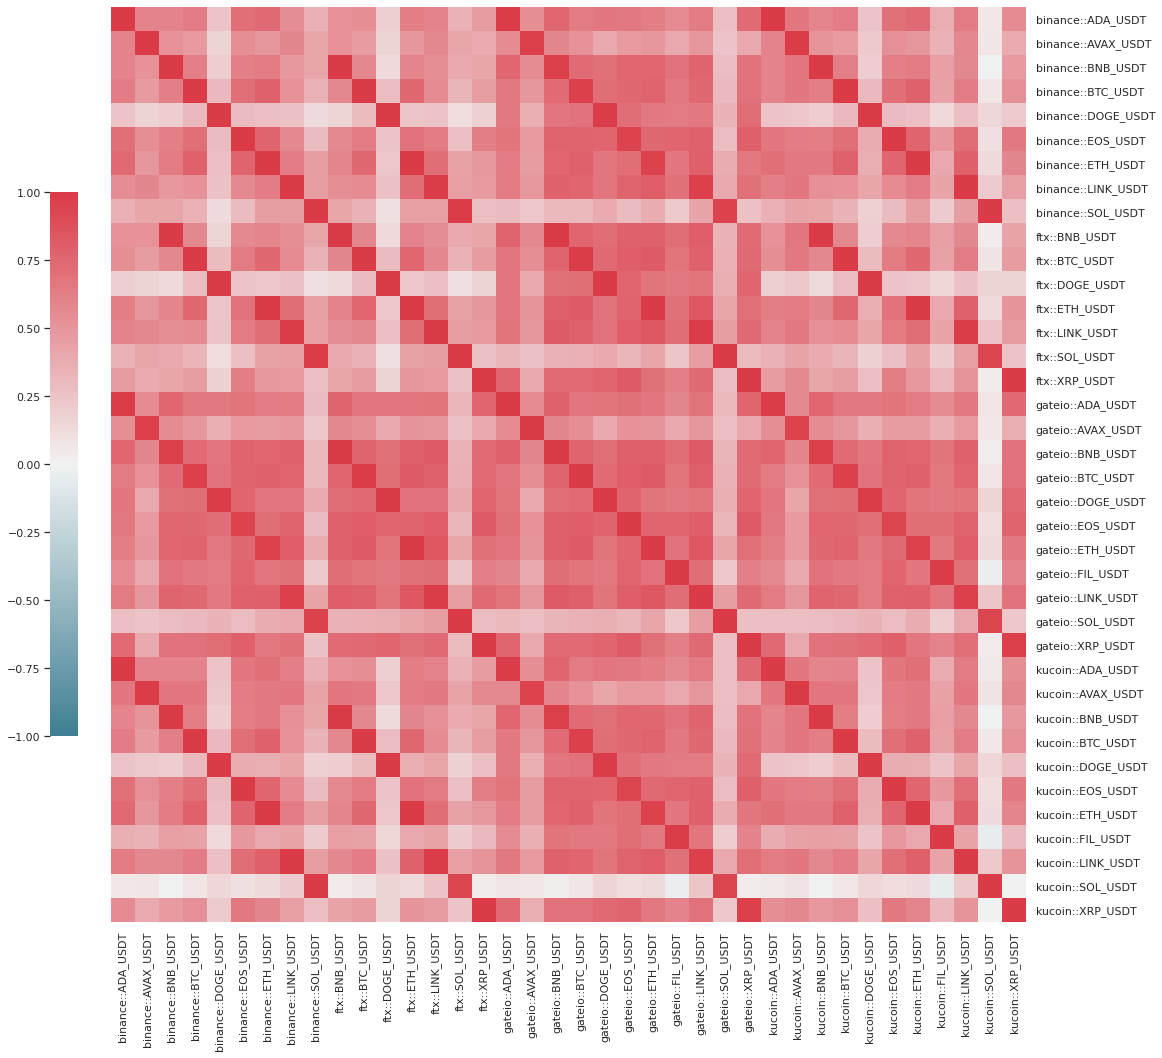

In [15]:
corr_matrix_1day = df_returns_1day.corr()
_ = coplotti.plot_heatmap(corr_matrix_1day)

Resampling to 1 day makes clusters much more visible. <br>
If we take a look at correlation numbers, we can see that equal currencies on different exchanges have a correlation above ~0.94 while different currencies correlate at much less rate.

Therefore, it seems that for detecting similar currencies we'd better use 1 day frequency.

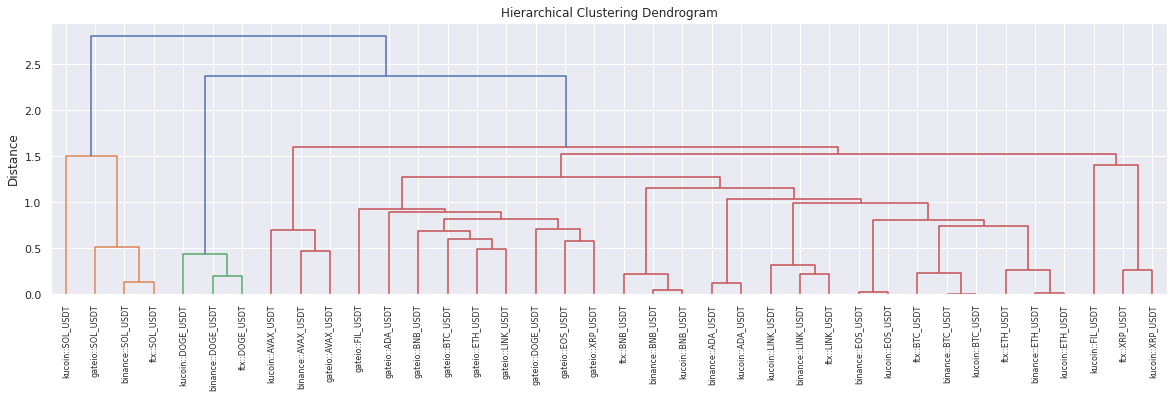

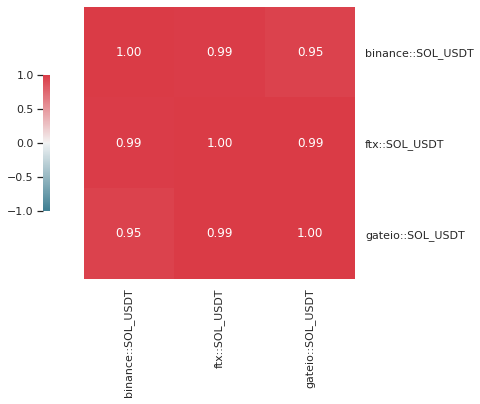

Current cluster is 1
Original series in cluster is ['gateio::SOL_USDT', 'ftx::SOL_USDT', 'binance::SOL_USDT']
Series to keep in cluster is ['binance::SOL_USDT']


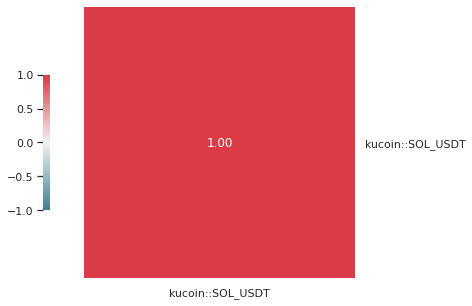

Current cluster is 2
Original series in cluster is ['kucoin::SOL_USDT']
Series to keep in cluster is ['kucoin::SOL_USDT']


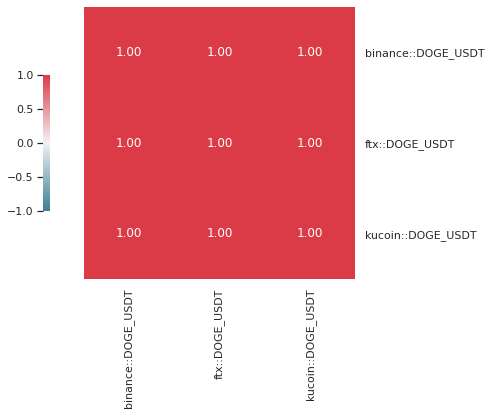

Current cluster is 3
Original series in cluster is ['binance::DOGE_USDT', 'ftx::DOGE_USDT', 'kucoin::DOGE_USDT']
Series to keep in cluster is ['binance::DOGE_USDT']


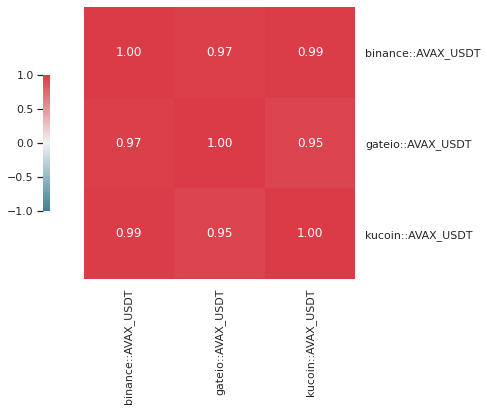

Current cluster is 4
Original series in cluster is ['kucoin::AVAX_USDT', 'binance::AVAX_USDT', 'gateio::AVAX_USDT']
Series to keep in cluster is ['binance::AVAX_USDT']


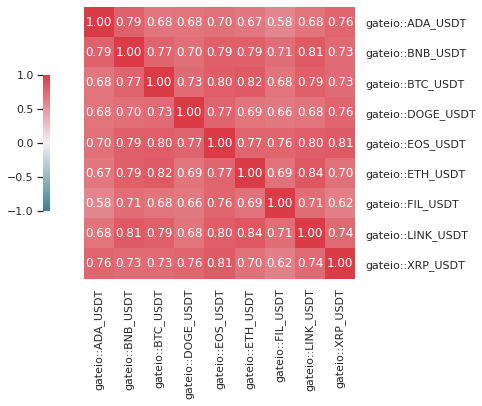

Current cluster is 5
Original series in cluster is ['gateio::ADA_USDT', 'gateio::ETH_USDT', 'gateio::FIL_USDT', 'gateio::EOS_USDT', 'gateio::BTC_USDT', 'gateio::XRP_USDT', 'gateio::DOGE_USDT', 'gateio::LINK_USDT', 'gateio::BNB_USDT']
Series to keep in cluster is ['gateio::ADA_USDT', 'gateio::BTC_USDT', 'gateio::DOGE_USDT', 'gateio::FIL_USDT', 'gateio::LINK_USDT', 'gateio::XRP_USDT']


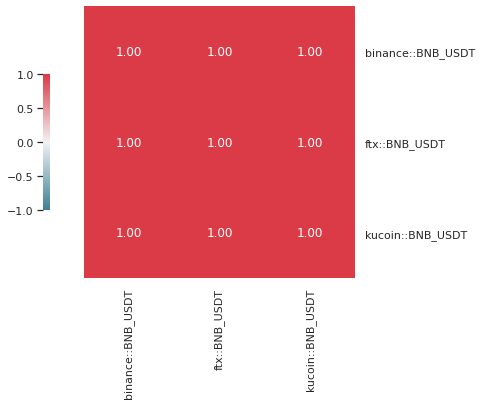

Current cluster is 6
Original series in cluster is ['ftx::BNB_USDT', 'binance::BNB_USDT', 'kucoin::BNB_USDT']
Series to keep in cluster is ['binance::BNB_USDT']


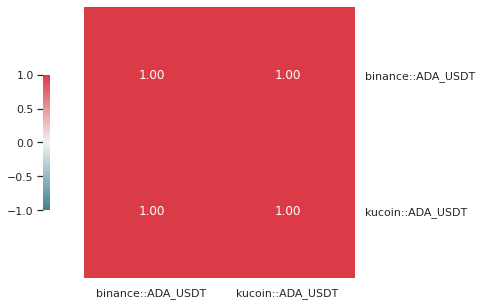

Current cluster is 7
Original series in cluster is ['kucoin::ADA_USDT', 'binance::ADA_USDT']
Series to keep in cluster is ['binance::ADA_USDT']


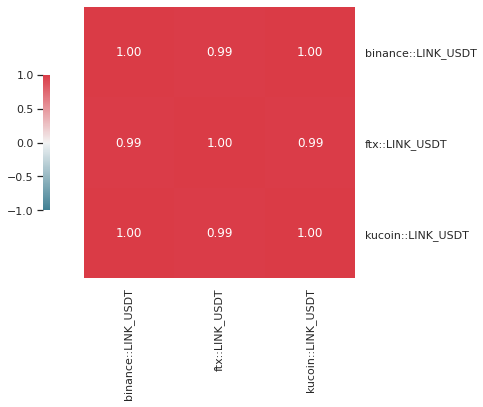

Current cluster is 8
Original series in cluster is ['ftx::LINK_USDT', 'binance::LINK_USDT', 'kucoin::LINK_USDT']
Series to keep in cluster is ['binance::LINK_USDT']


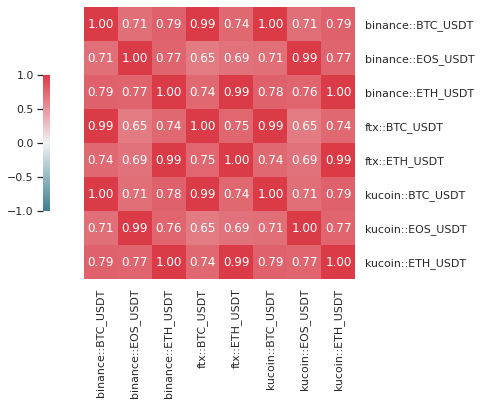

Current cluster is 9
Original series in cluster is ['kucoin::BTC_USDT', 'kucoin::ETH_USDT', 'ftx::ETH_USDT', 'kucoin::EOS_USDT', 'ftx::BTC_USDT', 'binance::BTC_USDT', 'binance::ETH_USDT', 'binance::EOS_USDT']
Series to keep in cluster is ['binance::BTC_USDT', 'binance::EOS_USDT', 'binance::ETH_USDT']


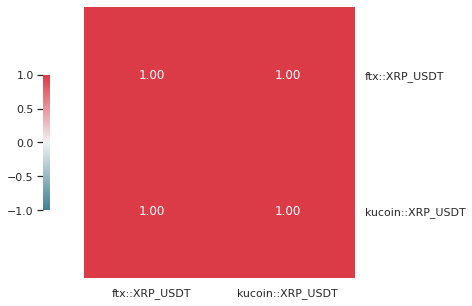

Current cluster is 10
Original series in cluster is ['kucoin::XRP_USDT', 'ftx::XRP_USDT']
Series to keep in cluster is ['ftx::XRP_USDT']


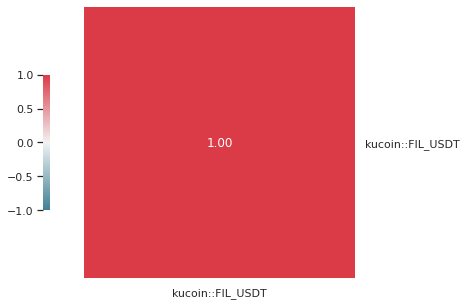

Current cluster is 11
Original series in cluster is ['kucoin::FIL_USDT']
Series to keep in cluster is ['kucoin::FIL_USDT']
Final number of selected time series is 18
Series to keep are: ['binance::SOL_USDT', 'kucoin::SOL_USDT', 'binance::DOGE_USDT', 'binance::AVAX_USDT', 'gateio::ADA_USDT', 'gateio::BTC_USDT', 'gateio::DOGE_USDT', 'gateio::FIL_USDT', 'gateio::LINK_USDT', 'gateio::XRP_USDT', 'binance::BNB_USDT', 'binance::ADA_USDT', 'binance::LINK_USDT', 'binance::BTC_USDT', 'binance::EOS_USDT', 'binance::ETH_USDT', 'ftx::XRP_USDT', 'kucoin::FIL_USDT']


In [16]:
_ = coplotti.cluster_and_select(df_returns_1day, 11)

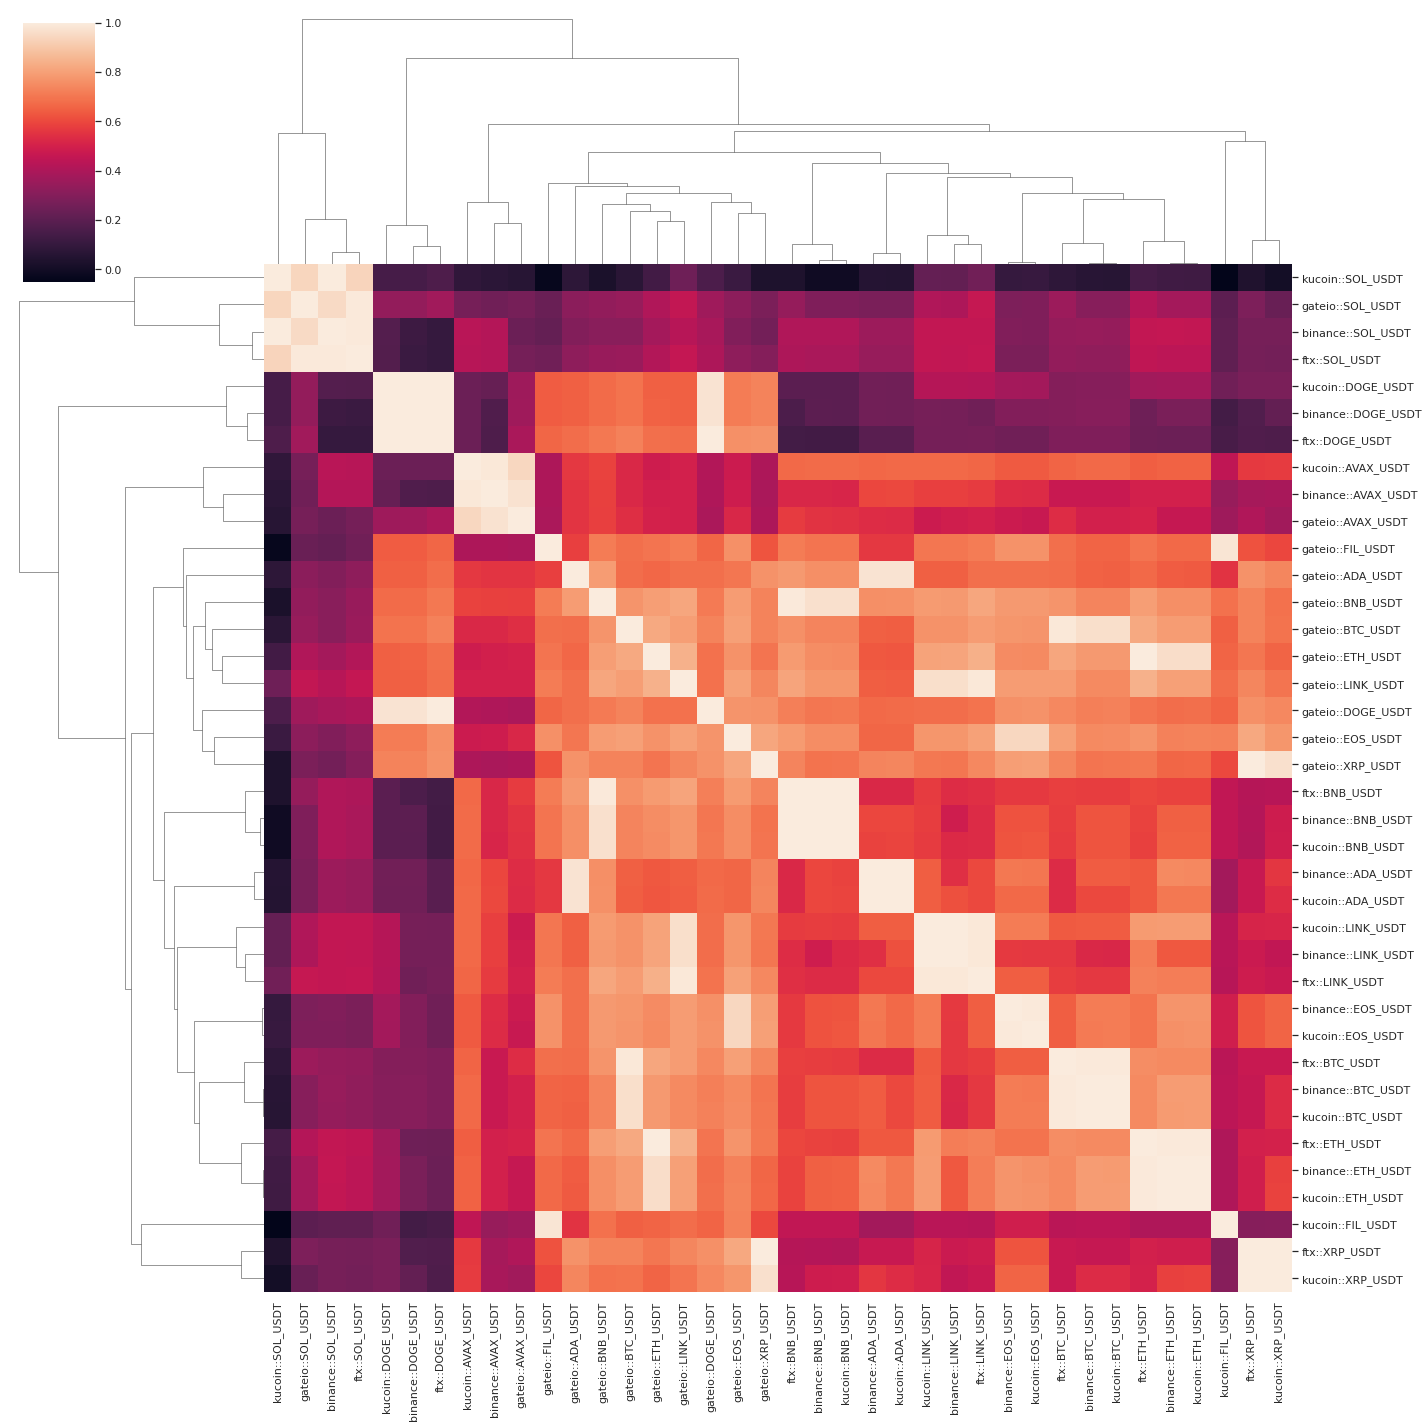

In [17]:
_ = sns.clustermap(corr_matrix_1day, figsize=(20, 20))

In [18]:
# Display top 10 most correlated series for each currency pair.
for colname in corr_matrix_1day.columns:
    corr_srs = corr_matrix_1day[colname]
    corr_srs_sorted = corr_srs.sort_values(ascending=False)
    display(corr_srs_sorted.head(10))

binance::ADA_USDT    1.000000
kucoin::ADA_USDT     0.999476
gateio::ADA_USDT     0.977112
gateio::BNB_USDT     0.757742
binance::ETH_USDT    0.741958
kucoin::ETH_USDT     0.740441
gateio::XRP_USDT     0.729552
binance::EOS_USDT    0.704082
kucoin::EOS_USDT     0.698861
gateio::DOGE_USDT    0.670653
Name: binance::ADA_USDT, dtype: float64

binance::AVAX_USDT    1.000000
kucoin::AVAX_USDT     0.990664
gateio::AVAX_USDT     0.972823
kucoin::ADA_USDT      0.599011
binance::ADA_USDT     0.597068
gateio::BNB_USDT      0.583773
binance::LINK_USDT    0.578303
kucoin::LINK_USDT     0.577479
ftx::LINK_USDT        0.572118
gateio::ADA_USDT      0.556685
Name: binance::AVAX_USDT, dtype: float64

binance::BNB_USDT    1.000000
kucoin::BNB_USDT     0.999668
ftx::BNB_USDT        0.996702
gateio::BNB_USDT     0.970041
gateio::LINK_USDT    0.771870
gateio::ADA_USDT     0.755640
gateio::EOS_USDT     0.750897
gateio::ETH_USDT     0.750783
gateio::BTC_USDT     0.731519
gateio::DOGE_USDT    0.700217
Name: binance::BNB_USDT, dtype: float64

binance::BTC_USDT    1.000000
kucoin::BTC_USDT     0.999047
ftx::BTC_USDT        0.992417
gateio::BTC_USDT     0.964043
kucoin::ETH_USDT     0.787648
binance::ETH_USDT    0.786749
gateio::ETH_USDT     0.780007
gateio::LINK_USDT    0.745258
gateio::EOS_USDT     0.744599
ftx::ETH_USDT        0.744403
Name: binance::BTC_USDT, dtype: float64

binance::DOGE_USDT    1.000000
kucoin::DOGE_USDT     0.999582
ftx::DOGE_USDT        0.999139
gateio::DOGE_USDT     0.978500
gateio::XRP_USDT      0.725924
gateio::EOS_USDT      0.712058
gateio::BTC_USDT      0.691638
gateio::BNB_USDT      0.674200
gateio::ETH_USDT      0.652276
gateio::ADA_USDT      0.650863
Name: binance::DOGE_USDT, dtype: float64

binance::EOS_USDT    1.000000
kucoin::EOS_USDT     0.993057
gateio::EOS_USDT     0.945364
gateio::XRP_USDT     0.791263
gateio::LINK_USDT    0.788057
gateio::BNB_USDT     0.780620
gateio::BTC_USDT     0.771759
binance::ETH_USDT    0.766575
kucoin::ETH_USDT     0.766351
gateio::FIL_USDT     0.762078
Name: binance::EOS_USDT, dtype: float64

binance::ETH_USDT    1.000000
kucoin::ETH_USDT     0.997866
ftx::ETH_USDT        0.992580
gateio::ETH_USDT     0.959579
gateio::LINK_USDT    0.795301
kucoin::LINK_USDT    0.789383
gateio::BTC_USDT     0.788222
binance::BTC_USDT    0.786749
kucoin::BTC_USDT     0.784662
binance::EOS_USDT    0.766575
Name: binance::ETH_USDT, dtype: float64

binance::LINK_USDT    1.000000
kucoin::LINK_USDT     0.999492
ftx::LINK_USDT        0.991781
gateio::LINK_USDT     0.963890
gateio::ETH_USDT      0.808984
gateio::BNB_USDT      0.782426
gateio::EOS_USDT      0.773352
gateio::BTC_USDT      0.763430
ftx::ETH_USDT         0.712900
gateio::XRP_USDT      0.698134
Name: binance::LINK_USDT, dtype: float64

binance::SOL_USDT     1.000000
kucoin::SOL_USDT      0.999418
ftx::SOL_USDT         0.992133
gateio::SOL_USDT      0.953566
binance::ETH_USDT     0.455547
kucoin::LINK_USDT     0.454166
kucoin::ETH_USDT      0.453605
binance::LINK_USDT    0.453580
ftx::ETH_USDT         0.450497
ftx::LINK_USDT        0.450244
Name: binance::SOL_USDT, dtype: float64

ftx::BNB_USDT        1.000000
binance::BNB_USDT    0.996702
kucoin::BNB_USDT     0.996518
gateio::BNB_USDT     0.992970
gateio::LINK_USDT    0.807396
gateio::EOS_USDT     0.785455
gateio::ETH_USDT     0.783051
gateio::ADA_USDT     0.780991
gateio::BTC_USDT     0.761289
gateio::XRP_USDT     0.732951
Name: ftx::BNB_USDT, dtype: float64

ftx::BTC_USDT        1.000000
kucoin::BTC_USDT     0.992468
binance::BTC_USDT    0.992417
gateio::BTC_USDT     0.991602
gateio::ETH_USDT     0.815054
gateio::EOS_USDT     0.798112
gateio::LINK_USDT    0.788383
gateio::BNB_USDT     0.768845
ftx::ETH_USDT        0.752681
kucoin::ETH_USDT     0.744610
Name: ftx::BTC_USDT, dtype: float64

ftx::DOGE_USDT        1.000000
binance::DOGE_USDT    0.999139
gateio::DOGE_USDT     0.997827
kucoin::DOGE_USDT     0.997397
gateio::XRP_USDT      0.762260
gateio::EOS_USDT      0.761154
gateio::BTC_USDT      0.722371
gateio::BNB_USDT      0.702593
gateio::ETH_USDT      0.680275
gateio::LINK_USDT     0.679834
Name: ftx::DOGE_USDT, dtype: float64

ftx::ETH_USDT        1.000000
gateio::ETH_USDT     0.995962
kucoin::ETH_USDT     0.992771
binance::ETH_USDT    0.992580
gateio::LINK_USDT    0.840905
gateio::BTC_USDT     0.820821
gateio::BNB_USDT     0.794063
kucoin::LINK_USDT    0.785720
gateio::EOS_USDT     0.767572
ftx::BTC_USDT        0.752681
Name: ftx::ETH_USDT, dtype: float64

ftx::LINK_USDT        1.000000
gateio::LINK_USDT     0.991790
binance::LINK_USDT    0.991781
kucoin::LINK_USDT     0.990940
gateio::ETH_USDT      0.836723
gateio::BNB_USDT      0.813438
gateio::EOS_USDT      0.799066
gateio::BTC_USDT      0.788908
gateio::XRP_USDT      0.739416
ftx::ETH_USDT         0.724486
Name: ftx::LINK_USDT, dtype: float64

ftx::SOL_USDT         1.000000
gateio::SOL_USDT      0.993181
binance::SOL_USDT     0.992133
kucoin::SOL_USDT      0.938192
gateio::LINK_USDT     0.457390
ftx::LINK_USDT        0.455076
kucoin::LINK_USDT     0.450631
binance::LINK_USDT    0.446199
ftx::ETH_USDT         0.442528
binance::ETH_USDT     0.437602
Name: ftx::SOL_USDT, dtype: float64

ftx::XRP_USDT        1.000000
gateio::XRP_USDT     0.998917
kucoin::XRP_USDT     0.995989
gateio::EOS_USDT     0.816684
gateio::ADA_USDT     0.765558
gateio::DOGE_USDT    0.758676
gateio::LINK_USDT    0.737220
gateio::BTC_USDT     0.729069
gateio::BNB_USDT     0.727487
gateio::ETH_USDT     0.698668
Name: ftx::XRP_USDT, dtype: float64

gateio::ADA_USDT     1.000000
kucoin::ADA_USDT     0.977743
binance::ADA_USDT    0.977112
gateio::BNB_USDT     0.787234
ftx::BNB_USDT        0.780991
ftx::XRP_USDT        0.765558
gateio::XRP_USDT     0.764487
binance::BNB_USDT    0.755640
kucoin::BNB_USDT     0.754661
kucoin::XRP_USDT     0.735403
Name: gateio::ADA_USDT, dtype: float64

gateio::AVAX_USDT     1.000000
binance::AVAX_USDT    0.972823
kucoin::AVAX_USDT     0.946317
gateio::BNB_USDT      0.581491
ftx::BNB_USDT         0.573204
gateio::ADA_USDT      0.554869
binance::BNB_USDT     0.551908
kucoin::BNB_USDT      0.548200
gateio::BTC_USDT      0.536445
ftx::BTC_USDT         0.534375
Name: gateio::AVAX_USDT, dtype: float64

gateio::BNB_USDT     1.000000
ftx::BNB_USDT        0.992970
kucoin::BNB_USDT     0.970237
binance::BNB_USDT    0.970041
gateio::LINK_USDT    0.814500
ftx::LINK_USDT       0.813438
ftx::ETH_USDT        0.794063
gateio::ETH_USDT     0.791406
gateio::EOS_USDT     0.790045
gateio::ADA_USDT     0.787234
Name: gateio::BNB_USDT, dtype: float64

gateio::BTC_USDT     1.000000
ftx::BTC_USDT        0.991602
kucoin::BTC_USDT     0.964432
binance::BTC_USDT    0.964043
ftx::ETH_USDT        0.820821
gateio::ETH_USDT     0.820501
gateio::EOS_USDT     0.798545
gateio::LINK_USDT    0.791453
ftx::LINK_USDT       0.788908
binance::ETH_USDT    0.788222
Name: gateio::BTC_USDT, dtype: float64

gateio::DOGE_USDT     1.000000
ftx::DOGE_USDT        0.997827
kucoin::DOGE_USDT     0.978761
binance::DOGE_USDT    0.978500
gateio::EOS_USDT      0.767023
gateio::XRP_USDT      0.762670
kucoin::EOS_USDT      0.762471
binance::EOS_USDT     0.760313
ftx::XRP_USDT         0.758676
ftx::BTC_USDT         0.738970
Name: gateio::DOGE_USDT, dtype: float64

gateio::EOS_USDT     1.000000
binance::EOS_USDT    0.945364
kucoin::EOS_USDT     0.944749
ftx::XRP_USDT        0.816684
gateio::XRP_USDT     0.813102
gateio::LINK_USDT    0.800427
ftx::LINK_USDT       0.799066
gateio::BTC_USDT     0.798545
ftx::BTC_USDT        0.798112
gateio::BNB_USDT     0.790045
Name: gateio::EOS_USDT, dtype: float64

gateio::ETH_USDT      1.000000
ftx::ETH_USDT         0.995962
kucoin::ETH_USDT      0.959798
binance::ETH_USDT     0.959579
gateio::LINK_USDT     0.841758
ftx::LINK_USDT        0.836723
gateio::BTC_USDT      0.820501
ftx::BTC_USDT         0.815054
binance::LINK_USDT    0.808984
kucoin::LINK_USDT     0.805376
Name: gateio::ETH_USDT, dtype: float64

gateio::FIL_USDT     1.000000
kucoin::FIL_USDT     0.983506
kucoin::EOS_USDT     0.762567
binance::EOS_USDT    0.762078
gateio::EOS_USDT     0.761131
gateio::LINK_USDT    0.712667
gateio::BNB_USDT     0.711987
ftx::BNB_USDT        0.711426
ftx::LINK_USDT       0.711269
kucoin::LINK_USDT    0.698920
Name: gateio::FIL_USDT, dtype: float64

gateio::LINK_USDT     1.000000
ftx::LINK_USDT        0.991790
kucoin::LINK_USDT     0.966337
binance::LINK_USDT    0.963890
gateio::ETH_USDT      0.841758
ftx::ETH_USDT         0.840905
gateio::BNB_USDT      0.814500
ftx::BNB_USDT         0.807396
gateio::EOS_USDT      0.800427
kucoin::ETH_USDT      0.795459
Name: gateio::LINK_USDT, dtype: float64

gateio::SOL_USDT      1.000000
ftx::SOL_USDT         0.993181
binance::SOL_USDT     0.953566
kucoin::SOL_USDT      0.942445
ftx::LINK_USDT        0.459043
gateio::LINK_USDT     0.453294
ftx::ETH_USDT         0.414908
gateio::ETH_USDT      0.407708
kucoin::LINK_USDT     0.405302
binance::LINK_USDT    0.400558
Name: gateio::SOL_USDT, dtype: float64

gateio::XRP_USDT     1.000000
ftx::XRP_USDT        0.998917
kucoin::XRP_USDT     0.970259
gateio::EOS_USDT     0.813102
kucoin::EOS_USDT     0.796867
binance::EOS_USDT    0.791263
gateio::ADA_USDT     0.764487
gateio::DOGE_USDT    0.762670
ftx::DOGE_USDT       0.762260
ftx::LINK_USDT       0.739416
Name: gateio::XRP_USDT, dtype: float64

kucoin::ADA_USDT     1.000000
binance::ADA_USDT    0.999476
gateio::ADA_USDT     0.977743
gateio::BNB_USDT     0.758986
gateio::XRP_USDT     0.736416
kucoin::ETH_USDT     0.704465
binance::ETH_USDT    0.704244
gateio::DOGE_USDT    0.674333
kucoin::AVAX_USDT    0.668860
binance::EOS_USDT    0.668824
Name: kucoin::ADA_USDT, dtype: float64

kucoin::AVAX_USDT     1.000000
binance::AVAX_USDT    0.990664
gateio::AVAX_USDT     0.946317
kucoin::BNB_USDT      0.673715
binance::BNB_USDT     0.673414
kucoin::LINK_USDT     0.669713
binance::BTC_USDT     0.669505
kucoin::BTC_USDT      0.669309
ftx::BNB_USDT         0.668892
kucoin::ADA_USDT      0.668860
Name: kucoin::AVAX_USDT, dtype: float64

kucoin::BNB_USDT     1.000000
binance::BNB_USDT    0.999668
ftx::BNB_USDT        0.996518
gateio::BNB_USDT     0.970237
gateio::LINK_USDT    0.771085
gateio::ADA_USDT     0.754661
gateio::EOS_USDT     0.750790
gateio::ETH_USDT     0.748916
gateio::BTC_USDT     0.730379
gateio::DOGE_USDT    0.701332
Name: kucoin::BNB_USDT, dtype: float64

kucoin::BTC_USDT     1.000000
binance::BTC_USDT    0.999047
ftx::BTC_USDT        0.992468
gateio::BTC_USDT     0.964432
kucoin::ETH_USDT     0.787946
binance::ETH_USDT    0.784662
gateio::ETH_USDT     0.780058
gateio::EOS_USDT     0.746195
gateio::LINK_USDT    0.745358
ftx::ETH_USDT        0.744396
Name: kucoin::BTC_USDT, dtype: float64

kucoin::DOGE_USDT     1.000000
binance::DOGE_USDT    0.999582
ftx::DOGE_USDT        0.997397
gateio::DOGE_USDT     0.978761
gateio::XRP_USDT      0.728178
gateio::EOS_USDT      0.710754
gateio::BTC_USDT      0.689279
gateio::BNB_USDT      0.671854
gateio::ADA_USDT      0.649138
gateio::ETH_USDT      0.648763
Name: kucoin::DOGE_USDT, dtype: float64

kucoin::EOS_USDT     1.000000
binance::EOS_USDT    0.993057
gateio::EOS_USDT     0.944749
gateio::XRP_USDT     0.796867
gateio::LINK_USDT    0.787740
gateio::BNB_USDT     0.780669
gateio::BTC_USDT     0.770065
kucoin::ETH_USDT     0.765021
gateio::FIL_USDT     0.762567
gateio::DOGE_USDT    0.762471
Name: kucoin::EOS_USDT, dtype: float64

kucoin::ETH_USDT     1.000000
binance::ETH_USDT    0.997866
ftx::ETH_USDT        0.992771
gateio::ETH_USDT     0.959798
gateio::LINK_USDT    0.795459
kucoin::LINK_USDT    0.789410
gateio::BTC_USDT     0.788026
kucoin::BTC_USDT     0.787946
binance::BTC_USDT    0.787648
binance::EOS_USDT    0.766351
Name: kucoin::ETH_USDT, dtype: float64

kucoin::FIL_USDT     1.000000
gateio::FIL_USDT     0.983506
gateio::EOS_USDT     0.721600
gateio::BNB_USDT     0.685317
gateio::LINK_USDT    0.676872
gateio::DOGE_USDT    0.658531
gateio::ETH_USDT     0.656041
gateio::BTC_USDT     0.648564
gateio::XRP_USDT     0.598775
gateio::ADA_USDT     0.552764
Name: kucoin::FIL_USDT, dtype: float64

kucoin::LINK_USDT     1.000000
binance::LINK_USDT    0.999492
ftx::LINK_USDT        0.990940
gateio::LINK_USDT     0.966337
gateio::ETH_USDT      0.805376
kucoin::ETH_USDT      0.789410
binance::ETH_USDT     0.789383
ftx::ETH_USDT         0.785720
gateio::BNB_USDT      0.784475
gateio::EOS_USDT      0.773696
Name: kucoin::LINK_USDT, dtype: float64

kucoin::SOL_USDT      1.000000
binance::SOL_USDT     0.999418
gateio::SOL_USDT      0.942445
ftx::SOL_USDT         0.938192
ftx::LINK_USDT        0.253427
gateio::LINK_USDT     0.246301
kucoin::LINK_USDT     0.222935
binance::LINK_USDT    0.218070
ftx::DOGE_USDT        0.165824
gateio::DOGE_USDT     0.160989
Name: kucoin::SOL_USDT, dtype: float64

kucoin::XRP_USDT     1.000000
ftx::XRP_USDT        0.995989
gateio::XRP_USDT     0.970259
gateio::EOS_USDT     0.772694
gateio::DOGE_USDT    0.738359
gateio::ADA_USDT     0.735403
gateio::LINK_USDT    0.694435
gateio::BTC_USDT     0.691154
gateio::BNB_USDT     0.687951
kucoin::EOS_USDT     0.659281
Name: kucoin::XRP_USDT, dtype: float64